# Exercise 8-2: Analyze the Cars data

**Name:**  Leah Nicholson <br/>
**Class:**  Data Visualization DEV 228<br/>
**Date:**  05/31/2025<br/>
**Desc:**  Melting, ranking, binning, grouping, aggregating, displaying data for Cars dataset

## Import the data

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
cars = pd.read_pickle('cars.pkl')

In [6]:
# display the first five rows
cars.head()

,aspiration,carbody,enginesize,curbweight,price
0,std,convertible,130,2548,13495.0
1,std,convertible,130,2548,16500.0
2,std,hatchback,152,2823,16500.0
3,std,sedan,109,2337,13950.0
4,std,sedan,136,2824,17450.0


## Melt the data

In [8]:
# Use the melt() method to combine the enginesize and curbweight columns. 
# Name the new variable column feature and use the default name 'value' for the value column. 

cars_melted = pd.melt(cars, id_vars = ['aspiration', 'carbody', 'price'], value_vars = ['enginesize', 'curbweight'], var_name = 'feature')
cars_melted

,aspiration,carbody,price,feature,value
0,std,convertible,13495.0,enginesize,130
1,std,convertible,16500.0,enginesize,130
2,std,hatchback,16500.0,enginesize,152
3,std,sedan,13950.0,enginesize,109
4,std,sedan,17450.0,enginesize,136
...,...,...,...,...,...
405,std,sedan,16845.0,curbweight,2952
406,turbo,sedan,19045.0,curbweight,3049
407,std,sedan,21485.0,curbweight,3012
408,turbo,sedan,22470.0,curbweight,3217


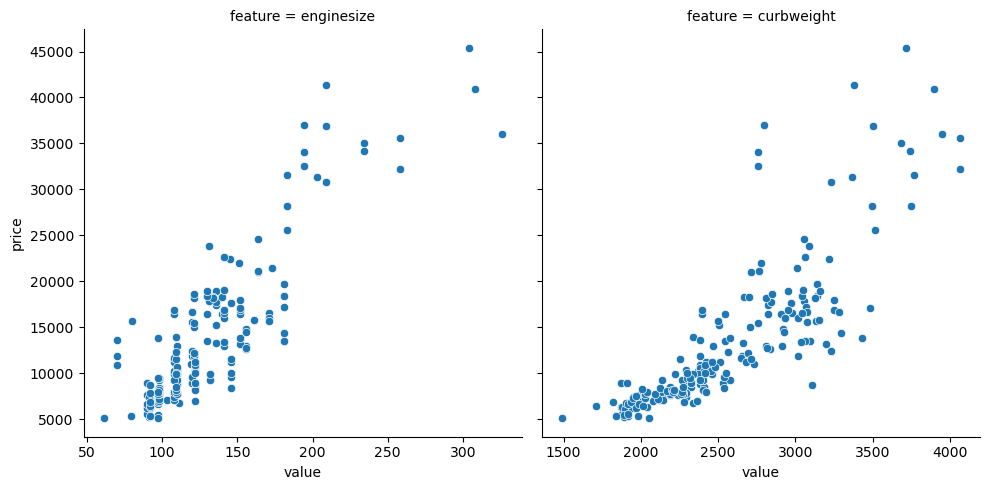

In [9]:
# Use the relplot() method to create a scatterplot for the feature and price data. 
# Use the col parameter to create a different plot for each feature. 
# Use the facet_kws parameter to give each subplot an independent x-axis. 

sns.relplot(data = cars_melted, x = 'value', y = 'price', col = 'feature', facet_kws = {'sharex':False})


## Rank the data by price

In [11]:
# Use the rank() method to add a priceRank column that ranks each row by the price value. 
cars_melted['priceRank'] = cars_melted.price.rank(ascending = True)

In [12]:
# display the ten rows with the lowest price in ascending order from lowest price to highest
cars_melted.sort_values('price').head(10)

,aspiration,carbody,price,feature,value,priceRank
343,std,hatchback,5118.0,curbweight,2050,1.5
138,std,hatchback,5118.0,enginesize,97,1.5
223,std,hatchback,5151.0,curbweight,1488,3.5
18,std,hatchback,5151.0,enginesize,61,3.5
255,std,hatchback,5195.0,curbweight,1890,5.5
50,std,hatchback,5195.0,enginesize,91,5.5
150,std,hatchback,5348.0,enginesize,92,7.5
355,std,hatchback,5348.0,curbweight,1985,7.5
281,std,hatchback,5389.0,curbweight,1918,9.5
76,std,hatchback,5389.0,enginesize,92,9.5


## Bin the data with quantiles

In [14]:
# use the qcut() method to create three price bins for the data: low, medium, and high
# store these bins in a new column named priceGrade

cars_melted['priceGrade'] = pd.qcut(cars_melted.price, q = 3, labels = ['low', 'medium', 'high'])
cars_melted = cars_melted.sort_values('price')   # sorting for clarity

In [15]:
# display the number of values for each bin in the priceGrade column - confirmed about equal
per_bin = cars_melted['priceGrade'].value_counts()
per_bin

priceGrade
low       138
medium    136
high      136
Name: count, dtype: int64

## Group and aggregate the data

In [17]:
# Group the cars data by the priceGrade column. 
# Use the agg() method to aggregate the price data with the min() and max() methods. 
# This should display the highest and lowest prices for each bin. 

cars_priceGrade_group = cars_melted.groupby('priceGrade', observed = False)['price'].agg(['min', 'max'])
cars_priceGrade_group


,min,max
priceGrade,,
low,5118.0,8449.0
medium,8495.0,13860.0
high,13950.0,45400.0


In [18]:
# Sanity check: checks out
cars_melted.price.min()

5118.0

In [19]:
# Sanity check: checks out
cars_melted.price.max()

45400.0

In [20]:
# Group the data by the carbody and aspiration columns, and get the average price for each group. 
# This returns a Series object with an index that’s created from the carbody and aspiration columns. 

cars_body_asp_group = cars_melted.groupby(['carbody', 'aspiration'], observed = False)['price'].agg(['mean']).round(2)
cars_body_asp_group

mean
carbody     aspiration          
convertible std         21890.50
hardtop     std         21356.00
            turbo       28176.00
hatchback   std          9699.61
            turbo       13345.24
sedan       std         13660.37
            turbo       17307.83
wagon       std         10973.60
            turbo       17965.40

In [21]:
# unstack the aspiration column of the index so the aspiration values are displayed as columns. 
cars_body_asp_unstacked = cars_body_asp_group.unstack(level = 'aspiration')
cars_body_asp_unstacked   # Confirmed:  The aspiration values (std and turbo) now display as columns


mean          
aspiration        std     turbo
carbody                        
convertible  21890.50       NaN
hardtop      21356.00  28176.00
hatchback     9699.61  13345.24
sedan        13660.37  17307.83
wagon        10973.60  17965.40

In [22]:
# use the pivot_table() method to accomplish the same task as the previous cell

cars_body_asp_pivotTable = cars_melted.pivot_table(index = 'carbody', columns = 'aspiration', values = 'price', aggfunc = 'mean').round(2)
cars_body_asp_pivotTable   # should be same as prior step - checks out

aspiration,std,turbo
carbody,,
convertible,21890.50,NaN
hardtop,21356.00,28176.00
hatchback,9699.61,13345.24
sedan,13660.37,17307.83
wagon,10973.60,17965.40


<Axes: title={'center': 'Average Car Price by Body Type and Aspiration'}, xlabel='carbody'>

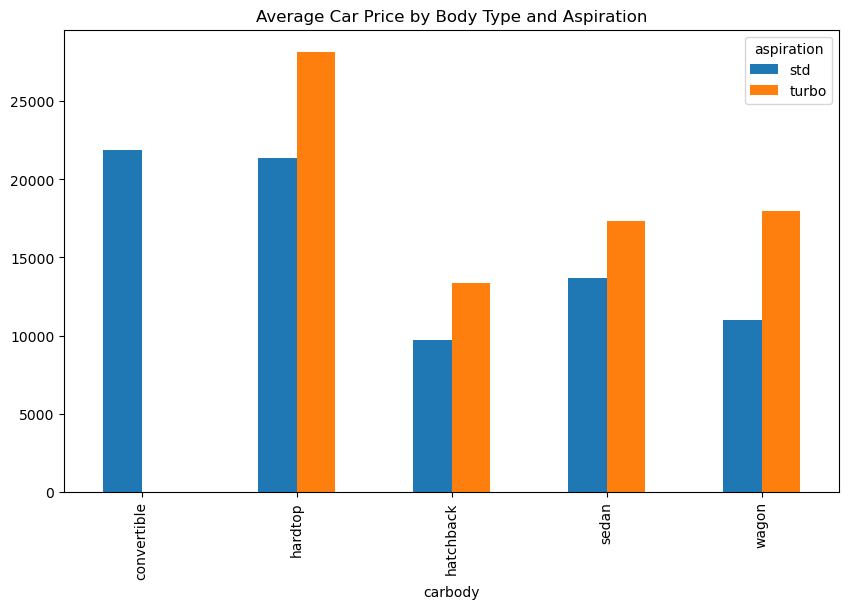

In [23]:
# use the Pandas plot() method to create a bar chart for the DataFrame created in the previous cell

cars_body_asp_pivotTable.plot(kind = 'bar', figsize = (10, 6), title = 'Average Car Price by Body Type and Aspiration')
